In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data visualization

In [2]:
df1 = pd.read_csv("1-home-price-train.csv")
df1

,area,price
0,2600,610
1,3000,650
2,3200,710
3,3600,780
4,4000,880


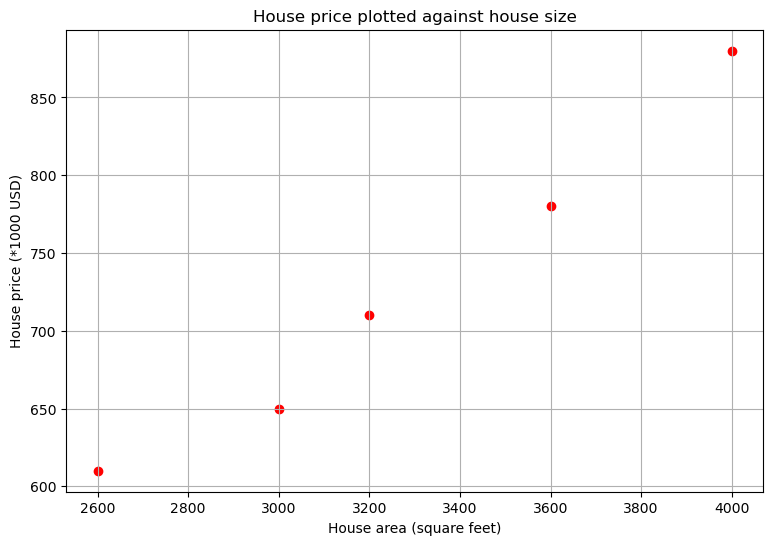

In [3]:
%matplotlib inline

plt.figure(figsize=(9,6))
plt.title("House price plotted against house size")
plt.scatter(df1.area, df1.price, color="red", marker='o')
plt.xlabel("House area (square feet)")
plt.ylabel("House price (*1000 USD)")
plt.grid(True)

plt.show()
# plt.savefig("./1-house-price-0.png")

## 2. Linear regression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()
model.fit(df1[["area"]].values, df1.price)

LinearRegression()

In [6]:
# fitting parameters
print(model.coef_, model.intercept_)

[0.19657534] 81.23287671232868


In [7]:
# accuracy of model
print(model.score(df1[["area"]].values, df1.price))

0.9786144542527533


In [8]:
print(np.mean((model.predict(df1[["area"]]) - df1.price)**2))

197.2602739726034


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


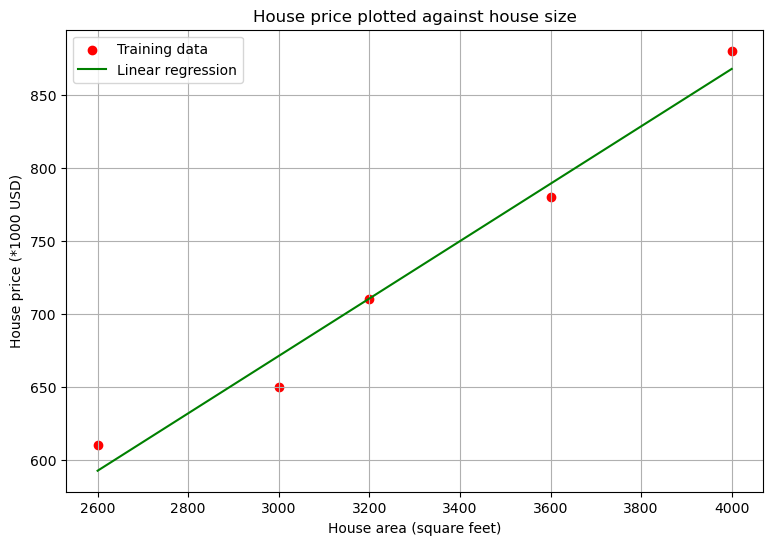

In [9]:
%matplotlib inline

plt.figure(figsize=(9,6))
plt.title("House price plotted against house size")
plt.xlabel("House area (square feet)")
plt.ylabel("House price (*1000 USD)")
plt.grid(True)

plt.scatter(df1.area, df1.price, color="red", marker='o', label="Training data")
plt.plot(df1.area, model.predict(df1[["area"]].values), color="g", label="Linear regression")
plt.legend()

plt.show()
# plt.savefig("./1-house-price.png")

## 3. New predictions

In [10]:
target_area = 3300
prediction_for_target_area = model.predict(np.array([[target_area]]))[0]
print(prediction_for_target_area)

729.931506849315


In [11]:
135.78767123*3300 + 180616.43835616432

628715.7534151643

In [12]:
df2 = pd.read_csv("1-home-price-predict.csv")
df2.tail(3)

,area
8,3700
9,3800
10,3900


In [13]:
model.predict(df2[["area"]]) # get a warning like "UserWarning: X has feature names, but LinearRegression was fitted without feature names warnings.warn"

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([611.98630137, 631.64383562, 651.30136986, 670.95890411,
       690.61643836, 729.93150685, 749.5890411 , 769.24657534,
       808.56164384, 828.21917808, 847.87671233])

In [14]:
new_prediction = model.predict(df2[["area"]].values)
new_prediction

array([611.98630137, 631.64383562, 651.30136986, 670.95890411,
       690.61643836, 729.93150685, 749.5890411 , 769.24657534,
       808.56164384, 828.21917808, 847.87671233])

In [15]:
df2["price"] = new_prediction
df2

,area,price
0,2700,611.986301
1,2800,631.643836
2,2900,651.301370
3,3000,670.958904
4,3100,690.616438
5,3300,729.931507
6,3400,749.589041
7,3500,769.246575
8,3700,808.561644
9,3800,828.219178


In [16]:
# update `1-home-price-predict.csv` document

# df2.to_csv("home_price_predict.csv", index=False)

In [17]:
%matplotlib inline

plt.figure(figsize=(9,6))
plt.title("House price plotted against house size")
plt.xlabel("House area (square feet)")
plt.ylabel("House price (*1000 USD)")
plt.grid(True)

plt.scatter(df1.area, df1.price, color="red", marker='o', label="Training data")
plt.plot(df1.area, model.predict(df1[["area"]].values), color="g", label="Linear regression")
plt.scatter(df2.area, df2.price, color="blue", marker='o', label="Prediction data")
plt.legend()

plt.savefig("./1-home-price-predicted.png")

## 4. Save model parameters

### 4.1 Using pickle

In [18]:
import pickle

# this is binary document
with open("1-home-price-pickle", "wb") as fout:
    pickle.dump(model, fout)

In [19]:
# reuse this model
with open("1-home-price-pickle", "rb") as fin:
    new_model = pickle.load(fin)

In [20]:
print(new_model, model.coef_, model.intercept_)

LinearRegression() [0.19657534] 81.23287671232868


In [21]:
# make new prediction (as shown in df2 above)

new_model.predict([[3000], [5000]])

array([ 670.95890411, 1064.10958904])

In [22]:
# now you can share the `1-model-pickle` file to colleagues

In [23]:
fout = pickle.dumps(model)
model2 = pickle.loads(fout)
print(model2, model2.coef_, model2.intercept_)

LinearRegression() [0.19657534] 81.23287671232868


### 4.2 Using `joblib` in sklearn

In [24]:
# joblib is more efficient than pickle objects 
# that carry large numpy arrays internally as is often the case for 
# fitted scikit-learn estimators

import joblib

In [25]:
joblib.dump(model, "1-home-price-joblib.pkl")

['1-home-price-joblib.pkl']

In [26]:
model_joblib = joblib.load("1-home-price-joblib.pkl")

In [27]:
print(model_joblib, model_joblib.coef_, model_joblib.intercept_)

LinearRegression() [0.19657534] 81.23287671232868


## 5. Evaluation of multiple model parameters

### 5.1 Plot of 3 trial models

In [28]:
# figure with multiple model parameters
%matplotlib inline

plt.figure(figsize=(9,6))
plt.title("House price plotted against house size")
plt.xlabel("House area (square feet)")
plt.ylabel("House price (*1000 USD)")
plt.grid(True)

plt.scatter(df1.area, df1.price, color="red", marker='o', label="Training data")
plt.plot(df1.area, model.predict(df1[["area"]].values), color="g", label="Linear regression model")

plt.plot(df1.area, df1.area*0.2050 + 81.0, 'b--', label="Model 1")
plt.plot(df1.area, df1.area*0.1850 + 81.0, 'k--', label="Model 2")
plt.plot(df1.area, df1.area*0.1050 + 390., 'c--', label="Model 3")

plt.legend()

plt.savefig("./1-home-price-trial-models.png")

In [29]:
# `residuals` for `cost function`
%matplotlib inline

plt.figure(figsize=(9,6))
plt.title("House price plotted against house size")
plt.xlabel("House area (square feet)")
plt.ylabel("House price (*1000 USD)")
# plt.grid(True)

residuals = model.predict(df1[["area"]].values)

plt.scatter(df1.area, df1.price, color="red", marker='o', label="Training data")
plt.plot(df1.area, model.predict(df1[["area"]].values), color="g", label="Linear regression model")
plt.vlines(df1.area, ymin=residuals, ymax=df1.price, color='black', linewidth=2, linestyles='dashed')

plt.legend()

# plt.show()
plt.savefig("./1-home-price-cost-func.png")

### 5.2 Residual sum of squares (RSS) for all models

In [30]:
ss_res_linear_model = np.mean((model.predict(df1[["area"]]) - df1.price)**2)
ss_res_model_1 = np.mean((df1.area*0.2050 + 81.0 - df1.price)**2)
ss_res_model_2 = np.mean((df1.area*0.1850 + 81.0 - df1.price)**2)
ss_res_model_3 = np.mean((df1.area*0.1050 + 390. - df1.price)**2)

print("The RSS for linear regression model is %.2f." % ss_res_linear_model)
print("The RSS for trial model 1 is %.2f." % ss_res_model_1)
print("The RSS for trial model 2 is %.2f." % ss_res_model_2)
print("The RSS for trial model 3 is %.2f." % ss_res_model_3)

The RSS for linear regression model is 197.26.
The RSS for trial model 1 is 964.60.
The RSS for trial model 2 is 1687.80.
The RSS for trial model 3 is 2226.80.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## 6. Solving ordinary least squares (OLS)

### 6.1 Calculate **variance of x**

Equation $var(x) = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}$
- $\bar{x}$ is the mean of x
- $x_i$ is value of x for $i^{th}$ training instance
- $n$ is number of training instances

In [31]:
x = df1.area
x_bar = x.mean()
variance = ((x - x_bar)**2).sum() / (x.shape[0] - 1)
print("X_bar = ", x_bar, "\nVariance =", variance)

X_bar =  3280.0 
Variance = 292000.0


In [32]:
# Using `var` in numpy for calculating variance
# keyword parameter `ddof=1` is used to set Bessel's correction to calculate sample variance
# why we substract 1 from number of training instances when calculating sample variance?

print("Variance =", np.var(x, ddof=1), "(Calculated from Numpy).")

Variance = 292000.0 (Calculated from Numpy).


### 6.2 Calculate Covariance

Formula $cov(x,y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}$
- $\bar{y}$ is the mean of y
- $y_i$ is value of $i^th$ training instance

In [33]:
y = df1.price
y_bar = np.array(y).mean()
covariance = np.multiply((x - x_bar).transpose(), y - y_bar).sum() / (x.shape[0] - 1)
print("Y_bar = ", y_bar, "\nCovariance =", covariance)

Y_bar =  726.0 
Covariance = 57400.0


In [34]:
# Using `cov` in Numpy for calculating covariance

print("Covariance =", np.cov(x.T, y)[0][1], "(Calculated from Numpy).")

Covariance = 57400.0 (Calculated from Numpy).


### 6.3 Cal `w` and `b`

$w = \frac{cov(x,y)}{var(x)}$ 

$b = \bar{y} - w*\bar{x}$

In [35]:
print("w =", covariance / variance)
print("b =", y_bar - covariance / variance * x_bar)

print("\nCompare with model parameters:")
print("w =", model.coef_[0])
print("b =", model.intercept_)

w = 0.19657534246575342
b = 81.23287671232879

Compare with model parameters:
w = 0.19657534246575345
b = 81.23287671232868


## 7. Evaluating model

In [36]:
# model.fit(x,y) 
# x can be `x_train` and `x_test`